In [6]:
import pandas as pd
import numpy as np
from scipy.stats import norm
pd.set_option('display.max_columns', 500)
housing = pd.read_csv("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/Ames_Housing_Price_Data.csv", index_col=0)

housing_factor = pd.read_pickle('housing_factor.pkl')
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
1,909176150,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,True,SBrkr,1.0,0.0,TA,Typ,Gd,Detchd,1970,Unf,TA,TA,True,NoPool,NoFence,NoFeature,03,1970,WD,Normal
2,905476230,120,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,True,SBrkr,1.0,0.0,Gd,Typ,NoFireplace,Attchd,1970,Fin,TA,TA,True,NoPool,NoFence,NoFeature,02,1970,WD,Normal
3,911128020,30,C (all),Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1970,1970,Hip,CompShg,MetalSd,MetalSd,NoVeneer,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,True,SBrkr,0.0,0.0,Gd,Typ,NoFireplace,Detchd,1970,Unf,TA,Po,False,NoPool,NoFence,NoFeature,11,1970,WD,Normal
4,535377150,70,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1970,1970,Gable,CompShg,MetalSd,MetalSd,NoVeneer,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,True,SBrkr,0.0,0.0,TA,Typ,NoFireplace,Detchd,1970,Unf,TA,TA,False,NoPool,NoFence,NoFeature,05,1970,WD,Normal
5,534177230,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,1970,1970,Gable,CompShg,VinylSd,VinylSd,NoVeneer,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,NoFireplace,Attchd,1970,Fin,TA,TA,True,NoPool,NoFence,NoFeature,11,1970,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,False,FuseF,0.0,0.0,Fa,Typ,Gd,Detchd,1970,Unf,Fa,Po,True,NoPool,NoFence,NoFeature,05,1970,WD,Normal
760,905402060,20,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1970,1970,Hip,CompShg,BrkFace,Wd Sdng,NoVeneer,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,GasA,Ex,True,FuseA,0.0,0.0,TA,Min2,Gd,Attchd,1970,Unf,TA,TA,True,NoPool,NoFence,NoFeature,06,1970,WD,Normal
761,909275030,90,RH,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1970,1970,Gable,CompShg,MetalSd,MetalSd,NoVeneer,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,False,FuseA,0.0,0.0,TA,Typ,NoFireplace,2Types,1970,Unf,TA,TA,True,NoPool,NoFence,NoFeature,08,1970,WD,Normal
762,907192040,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1970,1970,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,1970,Fin,TA,TA,True,NoPool,NoFence,NoFeature,07,1970,WD,Normal


In [7]:
from sklearn.preprocessing import LabelEncoder
SalePrice = housing['SalePrice'] #This is the target
housing_factor_dummified1 = housing_factor.drop(['PID', "YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd'], axis=1)
label_encoder = LabelEncoder()
housing_factor_dummified1= housing_factor_dummified1.apply(label_encoder.fit_transform)
housing_factor_dummified1 = pd.get_dummies(housing_factor_dummified1, drop_first = True)
housing_factor_dummified1

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,6,5,1,1,3,3,0,0,0,21,2,2,0,2,6,5,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,3,1,0,4,6,2,5,3,5,5,1,3,4,1,9,4
2,0,5,1,1,3,3,0,4,0,7,2,2,4,2,5,4,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
3,6,1,1,1,3,3,0,4,0,11,2,2,0,2,5,8,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,3,0,0,2,6,3,5,3,5,4,0,3,4,1,9,4
4,11,5,1,1,3,3,0,0,0,20,2,2,0,5,4,7,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,3,0,0,4,6,3,5,3,5,5,0,3,4,1,9,4
5,10,5,1,1,3,3,0,4,0,17,2,2,0,5,8,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,6,5,1,1,3,3,0,4,0,3,2,2,0,1,6,5,1,0,13,14,2,3,4,0,5,5,3,6,6,3,1,0,1,0,0,1,6,2,5,3,1,4,1,3,4,1,9,4
760,5,5,1,1,0,3,0,1,0,7,2,2,0,2,3,4,3,0,3,14,2,3,4,3,3,3,4,4,4,1,0,1,0,0,0,4,3,2,1,3,5,5,1,3,4,1,9,4
761,15,4,1,1,3,1,0,4,0,6,2,2,2,5,5,5,1,0,8,8,2,3,4,1,5,5,3,1,6,1,4,0,0,0,0,4,6,3,0,3,5,5,1,3,4,1,9,4
762,10,5,1,1,3,3,0,4,0,5,2,2,0,5,7,4,1,0,12,13,1,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,5,1,0,5,5,1,3,4,1,9,4


(array([1.200e+01, 3.110e+02, 1.579e+03, 5.720e+02, 8.200e+01, 1.300e+01,
        4.000e+00, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([-152278.88240993,  -95931.33740493,  -39583.79239994,
          16763.75260506,   73111.29761005,  129458.84261505,
         185806.38762004,  242153.93262503,  298501.47763003,
         354849.02263502,  411196.56764002]),
 <BarContainer object of 10 artists>)

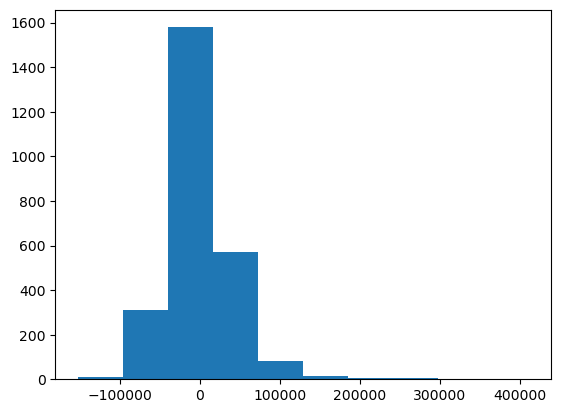

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(housing_factor_dummified1, housing['SalePrice'])
SalePrice = housing['SalePrice']

import matplotlib.pyplot as plt
residuals = SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [11]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.700
RSS is equal to 4352058158770.893
The intercept is 243043.844
The slopes are [  2584.78703924    290.59848684  30206.13892787    924.93533936
  -2558.24361816  -1793.91741463 -12560.1183752    -324.70275361
  12819.05148814    670.45569611   -493.56058807   1748.44732441
  -5663.94547568  -1843.58660609  10189.80948249   1913.03136255
   8479.49043151   8795.38040766  -1549.16901919    977.16276476
  -3643.88953303 -28964.25864221    564.31457223   1213.82802289
  -5828.68631939   1575.58144639  -3514.01094009  -1076.53912616
    613.23453645   3691.00269652  -1788.75341746  22504.35874813
    974.13530104  13562.67640639    321.63134927 -10348.14496396
    310.37266552  -1007.37716499  -3012.86168269  -4474.93821871
   -741.71368313   4913.96760466  13790.11132701 -37224.06078664
    687.21053202  -5093.47335318  -1164.25080479   4849.58145939]


In [12]:
print('negative slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ < 0]))
print('positive slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ > 0]))

negative slope column names Index(['LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Condition1',
       'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PoolQC',
       'MiscFeature', 'SaleType'],
      dtype='object')
positive slope column names Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandSlope',
       'Neighborhood', 'Condition2', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond',
       'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'Functional', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleCondition'],
      dtype='object')


(array([1.000e+00, 0.000e+00, 1.600e+01, 1.400e+02, 1.075e+03, 1.113e+03,
        2.010e+02, 2.200e+01, 9.000e+00, 3.000e+00]),
 array([-1.2869363 , -1.0326067 , -0.77827711, -0.52394752, -0.26961793,
        -0.01528833,  0.23904126,  0.49337085,  0.74770044,  1.00203004,
         1.25635963]),
 <BarContainer object of 10 artists>)

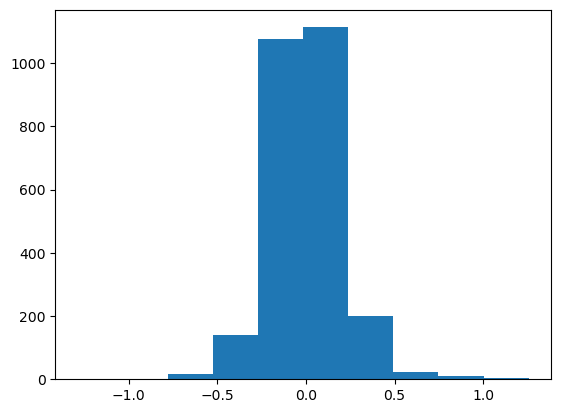

In [13]:
log_SalePrice = np.log(SalePrice) #Take log of DV
lm.fit(housing_factor_dummified1, log_SalePrice) #LM of log of DV
residuals = log_SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [14]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,log_SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.753
RSS is equal to 95.648
The intercept is 11.459
The slopes are [ 0.01675857 -0.00956123  0.18239881  0.01602118 -0.01350181 -0.00525555
 -0.09597485 -0.00192631  0.06456309  0.00248516  0.00080896  0.00589677
 -0.01877453 -0.0105333   0.08053319  0.02508698  0.03152876  0.03744833
 -0.00641417  0.00598016 -0.01562042 -0.09907963  0.00688047  0.01456179
 -0.0211532   0.00874323 -0.01332544 -0.00732136  0.00372838  0.02567988
 -0.01335082  0.18030323  0.01336671  0.06305647  0.00134744 -0.04437425
 -0.00317839  0.00169569 -0.02437849 -0.01956712  0.00248798  0.03394605
  0.1094011  -0.13567365  0.00457415 -0.02228137 -0.0024432   0.03491547]


In [15]:
scores = {}
for idx, name1 in enumerate(housing_factor_dummified1.columns):
        myColumns = housing_factor_dummified1.columns[(idx+1):]
        pass

In [16]:
from itertools import combinations 

scores = {}

combos = combinations(housing_factor_dummified1.columns, 3)

for c in combos:
    X = housing_factor_dummified1[list(c)]
    Y = log_SalePrice
    reg = LinearRegression().fit(X,Y)
    scores[c] = reg.score (X,Y)

In [17]:
sorted(scores.items(), key=lambda features_score: abs(features_score [1]), reverse = True)

[(('OverallQual', 'ExterQual', 'GarageType'), 0.6026141956958517),
 (('OverallQual', 'KitchenQual', 'GarageType'), 0.596276027060186),
 (('OverallQual', 'ExterQual', 'CentralAir'), 0.5926404692157317),
 (('OverallQual', 'ExterQual', 'PavedDrive'), 0.5834316499765775),
 (('OverallQual', 'CentralAir', 'KitchenQual'), 0.5792125400221664),
 (('OverallQual', 'ExterQual', 'BsmtFullBath'), 0.5781650580746058),
 (('OverallQual', 'ExterQual', 'GarageCond'), 0.5754876946341727),
 (('OverallQual', 'ExterQual', 'BsmtFinType1'), 0.573235133242645),
 (('OverallQual', 'KitchenQual', 'PavedDrive'), 0.5721632895467188),
 (('BldgType', 'OverallQual', 'ExterQual'), 0.5691165585943976),
 (('OverallQual', 'ExterQual', 'KitchenQual'), 0.5677191236686893),
 (('LotShape', 'OverallQual', 'ExterQual'), 0.5670023248253655),
 (('OverallQual', 'ExterQual', 'GarageQual'), 0.5669194020851839),
 (('OverallQual', 'ExterQual', 'BsmtExposure'), 0.5667027288616622),
 (('OverallQual', 'KitchenQual', 'GarageCond'), 0.56625

In [19]:
import statsmodels.api as sm
x = sm.add_constant(housing_factor_dummified1)
model = sm.OLS(log_SalePrice, x.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sat, 11 May 2024   Prob (F-statistic):               0.00
Time:                        01:55:32   Log-Likelihood:                 589.52
No. Observations:                2580   AIC:                            -1081.
Df Residuals:                    2531   BIC:                            -794.1
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.4594      0.152     75.170      0.000      11.160      11.758
MSSubClass        0.0168      0.002     11.139      0.000       0.014       0.020
MSZoning         -0.0096      0.005     -1.767      0.077      -0.020       0.001
Street            0.1824      0.065      2.807      0.005       0.055       0.310
Alley             0.0160      0.017      0.956      0.339      -0.017       0.049
LotShape         -0.0135      0.003     -4.482      0.000      -0.019      -0.008
LandContour      -0.0053      0.006     -0.832      0.406      -0.018       0.007
Utilities        -0.0960      0.144     -0.667      0.505      -0.378       0.186
LotConfig        -0.0019      0.002     -0.773      0.440      -0.007       0.003
LandSlope         0.0646      0.018      3.629      0.000       0.030       0.099
Neighborhood      0.0025      0.001      4.247      0.000       0.001       0.004
Condition1        0.0008      0.005      0.174      0.862      -0.008       0.010
Condition2        0.0059      0.019      0.318      0.751      -0.030       0.042
BldgType         -0.0188      0.004     -4.595      0.000      -0.027      -0.011
HouseStyle       -0.0105      0.003     -4.031      0.000      -0.016      -0.005
OverallQual       0.0805      0.004     21.844      0.000       0.073       0.088
OverallCond       0.0251      0.004      6.261      0.000       0.017       0.033
RoofStyle         0.0315      0.005      6.291      0.000       0.022       0.041
RoofMatl          0.0374      0.007      5.116      0.000       0.023       0.052
Exterior1st      -0.0064      0.002     -2.672      0.008      -0.011      -0.002
Exterior2nd       0.0060      0.002      2.755      0.006       0.002       0.010
MasVnrType       -0.0156      0.007     -2.286      0.022      -0.029      -0.002
ExterQual        -0.0991      0.009    -11.601      0.000      -0.116      -0.082
ExterCond         0.0069      0.005      1.281      0.200      -0.004       0.017
Foundation        0.0146      0.007      2.140      0.032       0.001       0.028
BsmtQual         -0.0212      0.003     -6.648      0.000      -0.027      -0.015
BsmtCond          0.0087      0.004      2.070      0.039       0.000       0.017
BsmtExposure     -0.0133      0.004     -3.425      0.001      -0.021      -0.006
BsmtFinType1     -0.0073      0.002     -3.539      0.000      -0.011      -0.003
BsmtFinType2      0.0037      0.003      1.234      0.217      -0.002       0.010
Heating           0.0257      0.017      1.492      0.136      -0.008       0.059
HeatingQC        -0.0134      0.003     -4.957      0.000      -0.019      -0.008
CentralAir        0.1803      0.020      9.076      0.000       0.141       0.219
Electrical        0.0134      0.005      2.451      0.014       0.003       0.024
BsmtFullBath      0.0631      0.009      7.210   

In [20]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < .05].sort_values()

The significant coefficients


const            0.000000e+00
OverallQual      4.727640e-97
ExterQual        2.347669e-30
MSSubClass       3.614302e-28
KitchenQual      1.548983e-23
GarageType       4.703848e-21
CentralAir       2.195885e-19
BsmtFullBath     7.378571e-13
BsmtQual         3.634829e-11
RoofStyle        3.713905e-10
OverallCond      4.485288e-10
PavedDrive       1.166383e-09
SaleCondition    7.920484e-09
GarageCond       3.012866e-08
RoofMatl         3.360300e-07
GarageFinish     3.368756e-07
HeatingQC        7.636054e-07
BldgType         4.537445e-06
LotShape         7.707911e-06
Neighborhood     2.248956e-05
HouseStyle       5.729297e-05
PoolQC           1.310893e-04
LandSlope        2.899207e-04
BsmtFinType1     4.086760e-04
BsmtExposure     6.235114e-04
Street           5.032760e-03
Exterior2nd      5.905401e-03
Exterior1st      7.578765e-03
Electrical       1.431586e-02
MasVnrType       2.233414e-02
Foundation       3.247591e-02
MiscFeature      3.455802e-02
BsmtCond         3.852127e-02
dtype: flo

In [21]:
print('The insignificant coefficients')
pValues[pValues > .05]

The insignificant coefficients


MSZoning        0.077341
Alley           0.338954
LandContour     0.405666
Utilities       0.504907
LotConfig       0.439739
Condition1      0.862078
Condition2      0.750733
ExterCond       0.200361
BsmtFinType2    0.217322
Heating         0.135719
BsmtHalfBath    0.930975
Functional      0.454896
FireplaceQu     0.625577
GarageQual      0.622530
Fence           0.210350
SaleType        0.325463
dtype: float64